# 03. PyTorch Computer Vision


**`segmentaion` read about this**

might handy for the project

## 1. Computer vision libaries in PyTorch

* [`torchvision`](https://www.learnpytorch.io/03_pytorch_computer_vision/) - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch.
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [1]:
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib
import matplotlib.pyplot as plt

#check version
print(torch.__version__)
print(torchvision.__version__)

2.4.0+cu124
0.19.0+cu124


## 1. Getting a dataset

The dataset we'll be using in FashinMNIST from torchvision.datasets


In [2]:
# setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(root = "data",
                                   train = True,
                                   download=True,
                                   transform = torchvision.transforms.ToTensor(),
                                   target_transform = None)
test_data = datasets.FashionMNIST(root = "data",
                                  train = False,
                                  download = True,
                                  transform=ToTensor(),
                                  target_transform= None)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
train_data[0][0].shape

torch.Size([1, 28, 28])

In [5]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [10]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_channels, height, width]") 
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


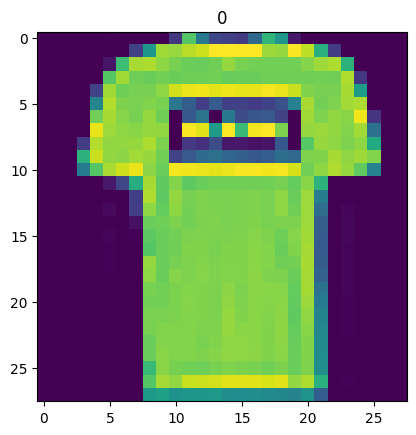

In [11]:
import matplotlib.pyplot as plt
image, label = train_data[1]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label);
# image

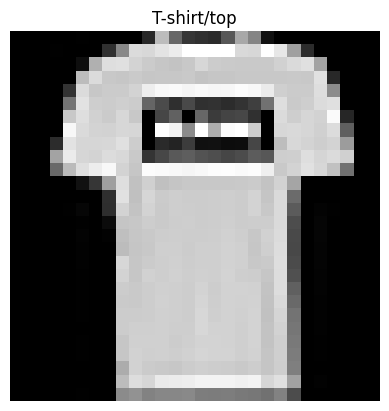

In [12]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis(False);

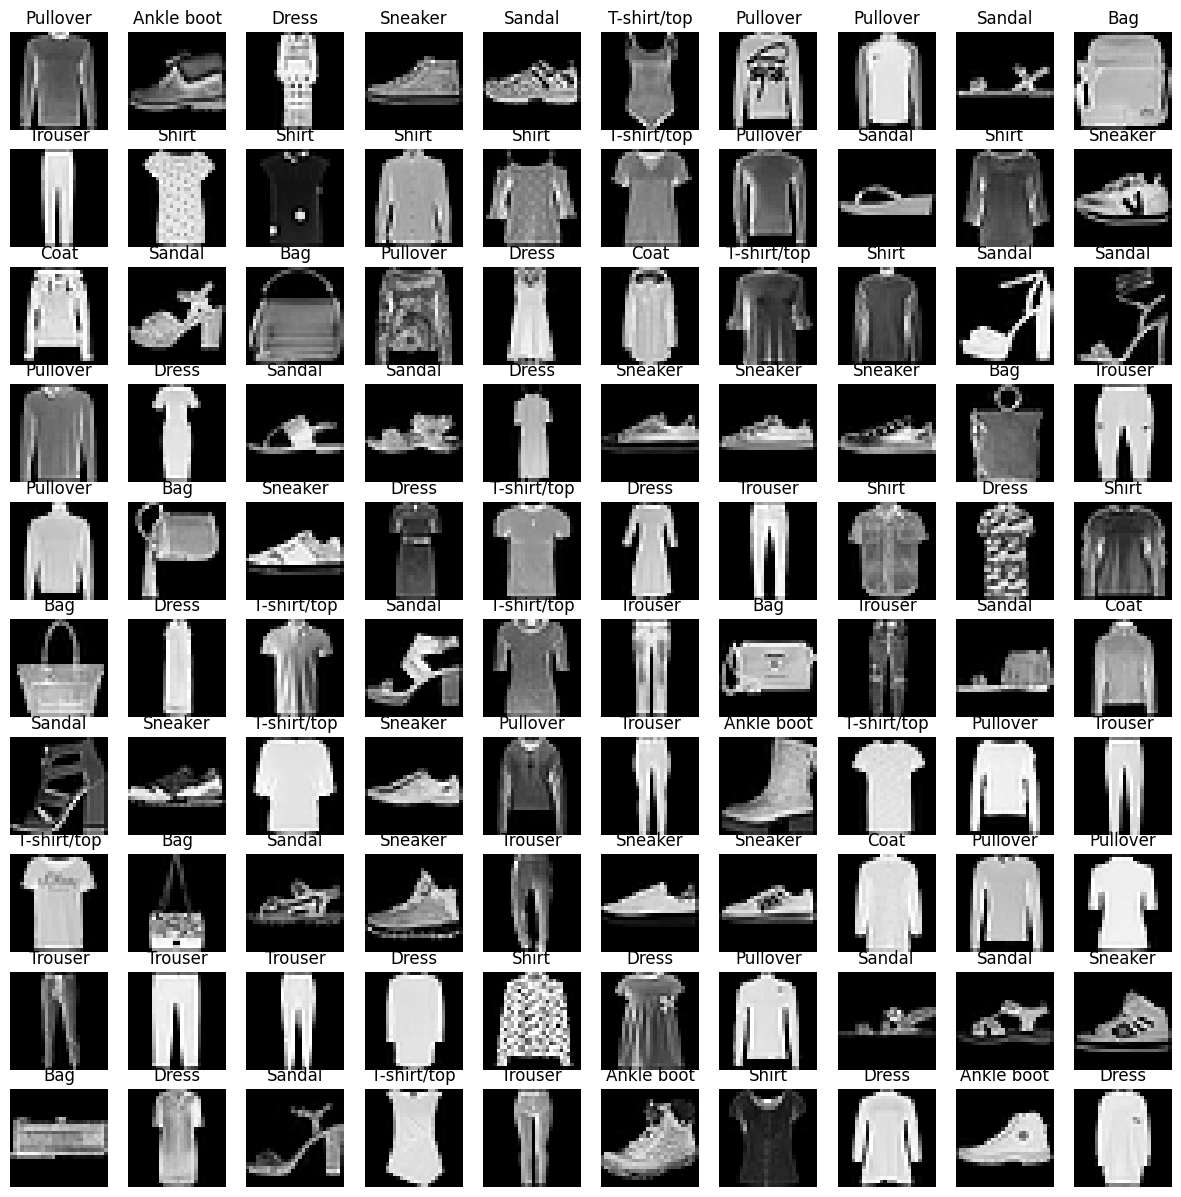

In [13]:
# Plot more images
# torch.manual_seed(42)
fig = plt.figure(figsize=(15,15))
rows, cols = 10, 10
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

## 2. prepare DataLoader
 Right Now, our data is in the form of pytorch

**`DataLoader turn our datasets into a pytorch iterable.`**

the point is 
**`We want to turn our data into batches (or mini-Batches).`**

the reasons!

1. it is more computationally efficient , as in , our computing hardware may not be able to look (store in memory) at 60000 images in one hit. so we breake it down to any batches like 32 , 18 or anything which help the model train in the device in bettter form

2. It gives our neural network more chance to upadte its gradients per epoch.


 

In [14]:
from torch.utils.data import DataLoader

# Setup the batch size
Batch_size = 32

# Turns datasets into iterables(Batches)
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = Batch_size,
                              shuffle = True)
test_dataloader = DataLoader(dataset = test_data,
                             batch_size = Batch_size,
                             shuffle = False)

train_dataloader, test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x20689aadca0>,
 <torch.utils.data.dataloader.DataLoader at 0x2068a0efa10>)

In [15]:
# lets's check out whats we've created 
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} betcehs of {Batch_size}")
print(f"Length of test_dataloader:{len(test_dataloader)} betches of {Batch_size}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000020689AADCA0>, <torch.utils.data.dataloader.DataLoader object at 0x000002068A0EFA10>)
Length of train_dataloader: 1875 betcehs of 32
Length of test_dataloader:313 betches of 32


In [16]:
# Checks out whats inside our training dataloader
train_features_batch , train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 0, label size: torch.Size([])


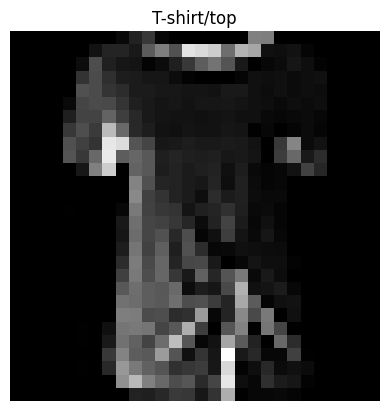

In [17]:
# Show a sample
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a Basline model




In [18]:
# create a flatten Layer
flatten_model = nn.Flatten()

# Get a single sample
X = train_features_batch[0]

# Flatten the sample
output = flatten_model(X) # perform forward pass

# Print ou twhat happened
print(f"shape before flattening: {X.shape}")
print(f"shape after flattening: {output.shape}")

shape before flattening: torch.Size([1, 28, 28])
shape after flattening: torch.Size([1, 784])


{x.shape} -> [color_channels, height, width]"

{output.shape} -> [color_channels, height `*`width]"

In [19]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_unit: int,
                 output_shapes: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_unit),
            nn.Linear(in_features = hidden_unit,
                      out_features = output_shapes)
        )

    def forward(self, X):
        return self.layer_stack(X)

In [20]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [21]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape = 28*28, 
    hidden_unit = 10, #how many units in the hidden layer
    output_shapes = len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

* **Summary**

* **`Purpose`** : Flatten is used to convert multi-dimensional tensors into a flat, 1-dimensional tensor.
Common 

* **`Usage`**: It is often used between convolutional layers and fully connected layers in neural networks.

* **`PyTorch Implementation`**: You can use nn.Flatten() as a layer or torch.flatten() as a function.
This operation is essential in neural networks for transitioning from convolutional to fully connected layers.

import torch.nn as nn

class SimpleCNN(nn.Module):
     def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(16 * 28 * 28, 10)  #
        
        Fully connected layer

     def forward(self, x):
        x = self.conv1(x)
        x = self.flatten(x)  # Flatten the output
        x = self.fc1(x)  # Pass it through the fully connected layer
        return x

##### Instantiate the model and print
model = SimpleCNN()
print(model)


In [22]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [23]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` (stochastic gradient descent)
* Evaluation metric - since we're working on a classification problem, let's use accruacy as our evaluation metric

In [24]:
import requests
from pathlib import Path

#downlaod help functionfrom learn Pytorhc repo

if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py"):
        f.write(request.content)

helper_functions.py already exists, skipping download


In [25]:
from helper_functions import accuracy_fn

# setup loss functon and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr= 0.1)

### 3.2 Creating a function to time our experiments

Machine learning is very experimental.

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs 


In [26]:
from timeit import default_timer as Timer
def print_train_timer(start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [27]:
start_time = Timer()

end_time = Timer()
print_train_timer(start = start_time, end = end_time, device = "gpu")

Train time on gpu: 0.000 seconds


2.6900001103058457e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time it all.

**Note:** Because we are computing on *batches*, the optimizer will update the model's parameters once *per batch* rather than once per epoch.

In [28]:
# import Tqdm for progress bar
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = Timer()

# set the epoch numbers of epochs
epochs = 5

# create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")

    ## training 
    train_loss = 0

    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()

        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss = loss + train_loss # accumulate train loss

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. loss backpropagation
        loss.backward()

        # 5. Optimizer step
        optimizer.step()


        # print out what's happening
        if batch % 400 == 0:
            print(f"Look at {batch} / {len(train_dataloader.dataset)} samples.")
    # divice total train loss by length of train dataloader
    train_loss/= len(train_dataloader)

    ## testing
    test_loss, test_acc =0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X_test)

            # 2. Calculate loss
            test_loss += loss_fn(test_pred, y_test)

            # 3. Calculate accuracy
            test_acc += accuracy_fn(y_true= y_test,
                                    y_pred = test_pred.argmax(dim=1))

        # Calculate the test loss average per batch
        test_loss/=len(test_dataloader)

        # Calculate the test accuracy average per batch
        test_acc /=len(test_dataloader)

    # Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

# calculate training time
train_time_end_on_cpu = Timer()
total_train_time_model_0 = print_train_timer(start = train_time_start_on_cpu, end = train_time_end_on_cpu, device = None)       




C:\Users\vivek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Look at 0 / 60000 samples.
Look at 400 / 60000 samples.
Look at 800 / 60000 samples.
Look at 1200 / 60000 samples.
Look at 1600 / 60000 samples.


 20%|██        | 1/5 [00:06<00:25,  6.41s/it]


Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%
Epoch: 1
---------
Look at 0 / 60000 samples.
Look at 400 / 60000 samples.
Look at 800 / 60000 samples.
Look at 1200 / 60000 samples.
Look at 1600 / 60000 samples.


 40%|████      | 2/5 [00:11<00:17,  5.77s/it]


Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%
Epoch: 2
---------
Look at 0 / 60000 samples.
Look at 400 / 60000 samples.
Look at 800 / 60000 samples.
Look at 1200 / 60000 samples.
Look at 1600 / 60000 samples.


 60%|██████    | 3/5 [00:16<00:10,  5.44s/it]


Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%
Epoch: 3
---------
Look at 0 / 60000 samples.
Look at 400 / 60000 samples.
Look at 800 / 60000 samples.
Look at 1200 / 60000 samples.
Look at 1600 / 60000 samples.


 80%|████████  | 4/5 [00:21<00:05,  5.33s/it]


Train loss: 0.44251 | Test loss: 0.46306, Test acc: 83.75%
Epoch: 4
---------
Look at 0 / 60000 samples.
Look at 400 / 60000 samples.
Look at 800 / 60000 samples.
Look at 1200 / 60000 samples.
Look at 1600 / 60000 samples.


100%|██████████| 5/5 [00:26<00:00,  5.39s/it]


Train loss: 0.43582 | Test loss: 0.46869, Test acc: 83.27%
Train time on None: 26.960 seconds



## 4. Make predictions and get Model 0 results


In [29]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.""" 

    loss, acc= 0,0 
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred probs -> pred labels)

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works if model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}
#Calculate model 0 results
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn, 
                             accuracy_fn=accuracy_fn)
model_0_results

100%|██████████| 313/313 [00:00<00:00, 567.53it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4686938524246216,
 'model_acc': 83.2667731629393}

# 5. Model 1: Building a better model with non-linearity 

In [30]:
# Create a model with non-linear and linear layers

class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into a single vector
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features = output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [31]:
# Create an instance of model_1

torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
next(model_1.parameters()).device
model_1 = model_1.to(device)

### 5.1 Setup loss, optimizer and evaluation metrics

In [32]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.1)


### 5.2 Functionizing training and evaluation/testing loops 

Let's create a function for:
* training loop - `train_step()`
* testing loop - `test_step()`

In [33]:
def train_step(model : torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn = torch.nn.Module,
               optimizer = torch.optim.Optimizer,
               accuracy_fn = accuracy_fn,
               device: torch.device = device):
    train_loss , train_acc = 0,0

    #put model into training mode
    model.train()

    # Add a loop to loop through the training batches
    for X, y in tqdm(data_loader):

        # Put data on the target device
        X,y = X.to (device), y.to(device)

        # 1. Forward pass
        y_pred = model(X).to(device)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred probs -> pred labels)

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()
    
    # Divide total train loss and train accuracy by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")


In [34]:
def test_step(model : torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    """Performs a testing loop step on model going over data_loader."""
    test_loss, test_acc = 0, 0

    # Put model in eval mode
    model.eval()
     
     # turn on inference mode context manager
    with torch.inference_mode():
        for X,y in data_loader:
            #send the data to the target device
            X,y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=test_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred probs -> pred labels)
            
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")
       

In [35]:
torch.manual_seed(42)
# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set number of epochs
epochs = 5

#create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(model=model_1,
               data_loader= train_dataloader,
               loss_fn =loss_fn,
               optimizer = optimizer,
               accuracy_fn = accuracy_fn,
               device = device)
    test_step(model=model_1,
              data_loader= test_dataloader,
              loss_fn = loss_fn,
              accuracy_fn = accuracy_fn,
              device = device)
    
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_timer(start= train_time_start_on_gpu,
                                                 end = train_time_end_on_gpu,
                                                 device = device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------


100%|██████████| 1875/1875 [00:08<00:00, 221.02it/s]


Train loss: 0.83069 | Train acc: 70.69%


 20%|██        | 1/5 [00:09<00:37,  9.40s/it]

Test loss: 0.59298 | Test acc: 79.19%
Epoch: 1
---------


100%|██████████| 1875/1875 [00:07<00:00, 245.45it/s]


Train loss: 0.48504 | Train acc: 82.79%


 40%|████      | 2/5 [00:17<00:26,  8.86s/it]

Test loss: 0.47888 | Test acc: 83.49%
Epoch: 2
---------


100%|██████████| 1875/1875 [00:10<00:00, 185.29it/s]


Train loss: 0.45199 | Train acc: 83.91%


 60%|██████    | 3/5 [00:29<00:19,  9.98s/it]

Test loss: 0.47127 | Test acc: 83.46%
Epoch: 3
---------


100%|██████████| 1875/1875 [00:08<00:00, 211.89it/s]


Train loss: 0.43340 | Train acc: 84.46%


 80%|████████  | 4/5 [00:38<00:09,  9.87s/it]

Test loss: 0.50523 | Test acc: 81.04%
Epoch: 4
---------


100%|██████████| 1875/1875 [00:08<00:00, 231.53it/s]


Train loss: 0.42361 | Train acc: 84.91%


100%|██████████| 5/5 [00:47<00:00,  9.57s/it]

Test loss: 0.46123 | Test acc: 83.05%
Train time on cuda: 47.849 seconds


In [36]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4686938524246216,
 'model_acc': 83.2667731629393}

In [37]:
# Train time on cpu
total_train_time_model_0

26.960199400004058

In [38]:
# # Get model_1 results dictionary
# model_1_results = eval_model(model=model_1,
#                              data_loader=test_dataloader,
#                              loss_fn=loss_fn,
#                              accuracy_fn=accuracy_fn)
# model_1_results



In [39]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """return a dictionary containing the results of model predicting on data_loader."""
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            # Make our data device agnostic
            X, y = X.to(device), y.to(device)

            # Make predictions
            y_pred = model(X)

            # Accumulate the lodd and acc values per batch
            loss += loss_fn(y_pred,y)
            acc += accuracy_fn(y_true=y,
                               y_pred = y_pred.argmax(dim=1))
            
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works if model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}


In [40]:
# model_1_results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader= test_dataloader,
                             loss_fn= loss_fn,
                             accuracy_fn= accuracy_fn,
                             device= device)
model_1_results


100%|██████████| 313/313 [00:00<00:00, 415.55it/s]


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.4612314999103546,
 'model_acc': 83.04712460063898}

In [41]:
# basline results
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4686938524246216,
 'model_acc': 83.2667731629393}

## Model 2: Building a Convolutional Neural Network (CNN)

CNN's are also known ConvNets.

In [42]:

class FashionMNISTModelV2(nn.Module):
    """model architecture that replicates the TinyVGG model from CNN explainer website"""

    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels= hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding =1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
            
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features = output_shape)
        )
    def forward(self,x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

In [43]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape= 1,
                              hidden_units= 10,
                              output_shape= len(class_names)).to(device)

In [44]:
rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [45]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

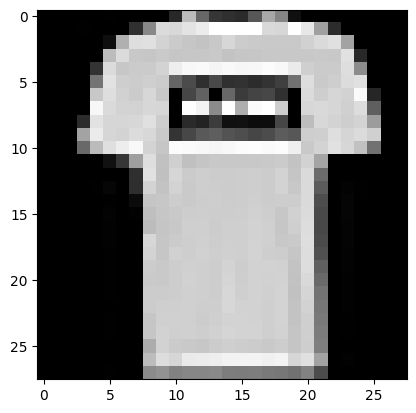

In [46]:
plt.imshow(image.squeeze(), cmap="gray")

### 7.1 Stepping through `nn.Conv2d()`

In [47]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0] 

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [48]:
test_image.shape

torch.Size([3, 64, 64])

In [49]:
torch.manual_seed(42)
#create a single conv2d layer
conv_layer = nn.Conv2d(in_channels= 3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=1,
                       padding=0)

# pass the data through the conv_layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 62, 62])

In [50]:
test_image.unsqueeze(0).shape

torch.Size([1, 3, 64, 64])

### 7.2 Stepping through `nn.MaxPool2d()`

In [51]:
# Print out original image shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


In [52]:
torch.manual_seed(42)
# Create a random tesnor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"\nRandom tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")


Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


### 7.3 Setup a loss function and optimizer for `model_2`

In [53]:
# Setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

### 7.4 Training and testing `model_2` using our training and test functions

In [54]:
from datetime import timedelta

def print_train_time(start, end, device):
    total_time = end - start
    print(f"Training on {device} took: {timedelta(seconds=total_time)}")
    return total_time


In [55]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer() 

# Train and test model
epochs = 5
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-------


100%|██████████| 1875/1875 [00:10<00:00, 178.67it/s]


Train loss: 0.59624 | Train acc: 78.28%


 20%|██        | 1/5 [00:11<00:47, 11.77s/it]

Test loss: 0.42490 | Test acc: 84.33%
Epoch: 1
-------


100%|██████████| 1875/1875 [00:09<00:00, 191.77it/s]


Train loss: 0.36231 | Train acc: 86.85%


 40%|████      | 2/5 [00:22<00:33, 11.15s/it]

Test loss: 0.34077 | Test acc: 87.63%
Epoch: 2
-------


100%|██████████| 1875/1875 [00:09<00:00, 195.22it/s]


Train loss: 0.32423 | Train acc: 88.13%


 60%|██████    | 3/5 [00:33<00:21, 10.87s/it]

Test loss: 0.32688 | Test acc: 88.24%
Epoch: 3
-------


100%|██████████| 1875/1875 [00:09<00:00, 192.83it/s]


Train loss: 0.30545 | Train acc: 88.88%


 80%|████████  | 4/5 [00:43<00:10, 10.80s/it]

Test loss: 0.32805 | Test acc: 87.77%
Epoch: 4
-------


100%|██████████| 1875/1875 [00:11<00:00, 159.33it/s]


Train loss: 0.29349 | Train acc: 89.32%


100%|██████████| 5/5 [00:56<00:00, 11.39s/it]

Test loss: 0.33345 | Test acc: 87.78%
Training on cuda took: 0:00:56.951056


In [56]:
# Get model_2 results
model_2_results = eval_model(
     model=model_2,
     data_loader=test_dataloader,
     loss_fn=loss_fn,
     accuracy_fn=accuracy_fn,
     device=device
)

model_2_results

100%|██████████| 313/313 [00:01<00:00, 230.41it/s]


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3334520161151886,
 'model_acc': 87.77955271565496}

## 8. Compare model results and training time 

In [57]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.468694,83.266773
1,FashionMNISTModelV1,0.461231,83.047125
2,FashionMNISTModelV2,0.333452,87.779553


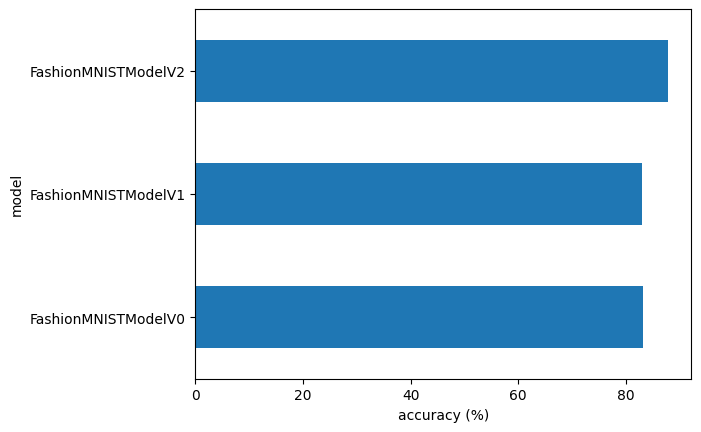

In [58]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

In [59]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs=[]
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension and pass to target device)4
            sample = torch.unsqueeze(sample, dim=0).to(device)

            #Forward pass (model outputs raw logits)
            pred_logits = model(sample)

            pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

            pred_probs.append(pred_prob.cpu())

    return torch.stack(pred_probs)


In [60]:
import random

In [61]:
test_samples = []
test_labels =  []
for sample, lables in random.sample(list(test_data), k= 9):
  test_samples.append(sample)
  test_labels.append(lables)

test_samples[0].shape

torch.Size([1, 28, 28])

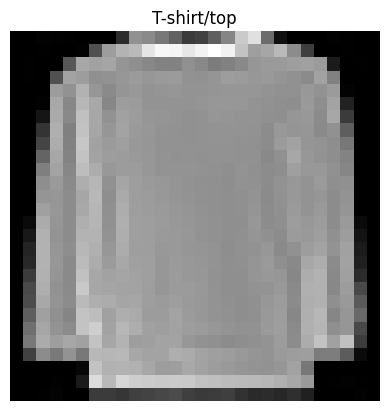

In [62]:
plt .imshow(test_samples[1].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])
plt.axis(False);


In [63]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first two prediction probabilities
pred_probs[:4]

tensor([[9.8760e-01, 1.2444e-04, 2.5376e-04, 1.6365e-03, 3.7220e-06, 3.6097e-08,
         1.0345e-02, 1.0186e-07, 3.6742e-05, 1.3629e-08],
        [4.0785e-02, 5.8430e-04, 9.1550e-01, 1.8515e-03, 2.7259e-03, 1.5661e-06,
         3.7725e-02, 1.9240e-05, 6.2789e-04, 1.8367e-04],
        [6.0982e-03, 2.6447e-02, 5.2906e-04, 9.6514e-01, 9.1902e-04, 3.3795e-05,
         1.4607e-04, 2.0938e-04, 1.0971e-04, 3.6637e-04],
        [7.5746e-05, 7.1710e-07, 7.6857e-06, 1.2404e-05, 4.8783e-07, 1.9333e-04,
         5.2090e-05, 3.2762e-03, 2.3956e-04, 9.9614e-01]])

In [64]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([0, 2, 3, 9, 3, 2, 8, 1, 9])

In [65]:
test_labels

[0, 2, 3, 9, 2, 3, 8, 1, 9]

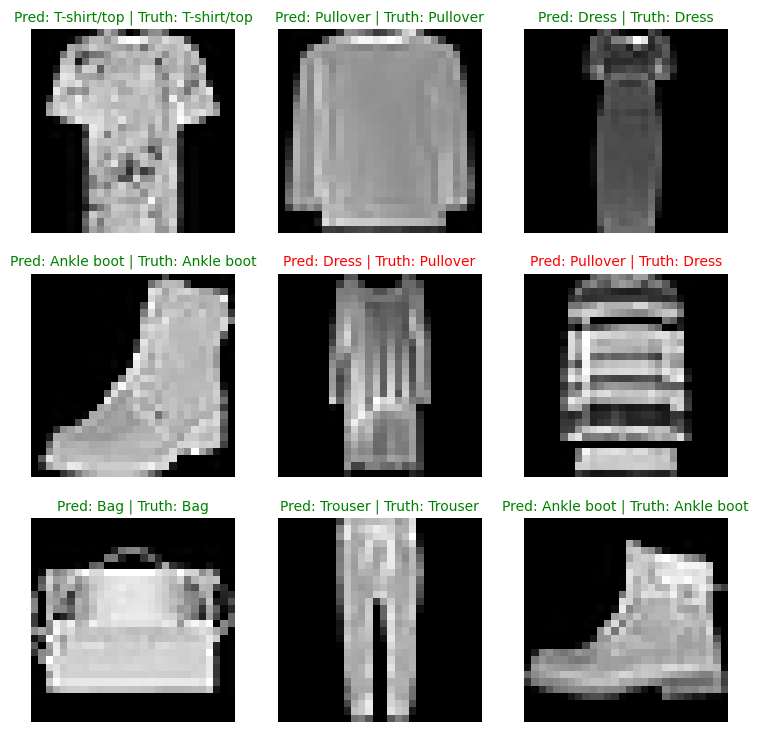

In [66]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction (in text form, e.g "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form) 
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c="r") 
  
  plt.axis(False);

## 10. Making a confusion matrix for further prediction evaluation 

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [67]:
y_preds =[]
model_2.eval()
with torch.inference_mode():
    #make prediction with trained model
    for X, y in tqdm(test_dataloader, desc = "Making Predictions"):
        X, y = X.to(device), y.to(device)#send data to target device
        y_logit = model_2(X) #do forward pass
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)#turn prediction from logits -> prediction lprobabilities -> prediction labels
        y_preds.append(y_pred.cpu())

# concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor


Making Predictions: 100%|██████████| 313/313 [00:01<00:00, 236.29it/s]


tensor([9, 2, 1,  ..., 8, 1, 0])

In [68]:
len(y_pred_tensor)

10000

In [69]:
# See if required packages are installed and if not, install them...
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1] >= 19, "mlxtend version should be 0.19.0 or higher")
except:
  !pip install torchmetrics -U mlxtend 
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.1
Defaulting to user installation because normal site-packages is not writeable
mlxtend version: 0.23.1


In [70]:
import mlxtend
print(mlxtend.__version__)

0.23.1


In [71]:
y_pred_tensor[:10]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [72]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

In [79]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [80]:
y_pred_tensor

tensor([9, 2, 1,  ..., 8, 1, 0])

In [82]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

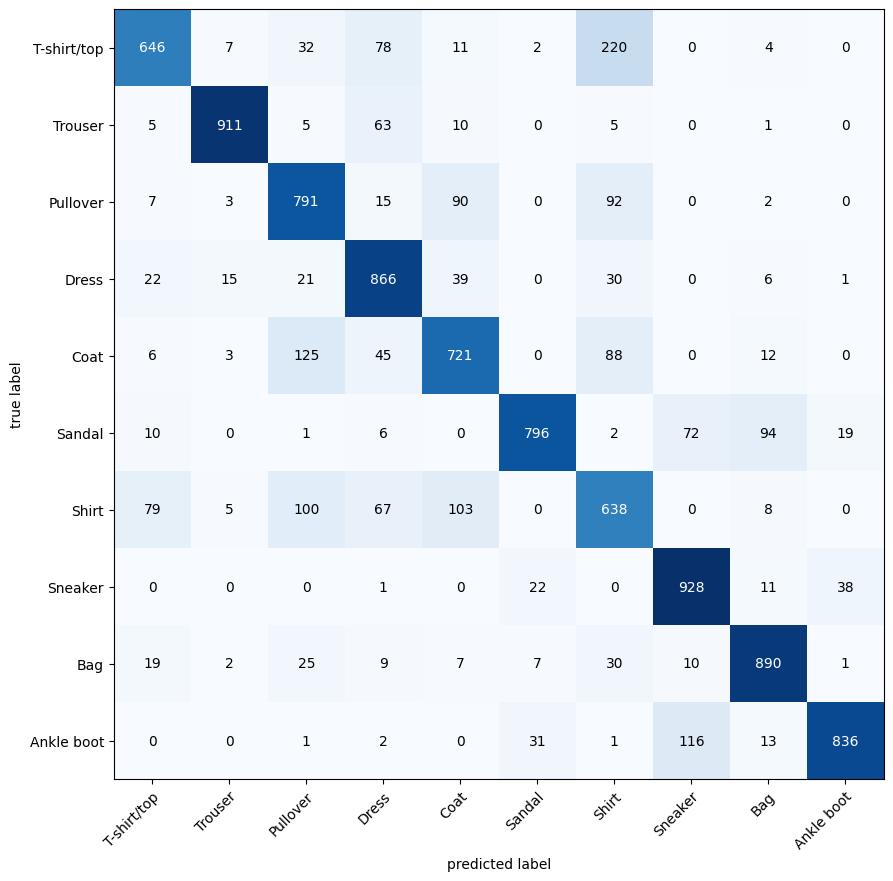

In [87]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 10)
);

In [88]:
confmat_tensor 

tensor([[646,   7,  32,  78,  11,   2, 220,   0,   4,   0],
        [  5, 911,   5,  63,  10,   0,   5,   0,   1,   0],
        [  7,   3, 791,  15,  90,   0,  92,   0,   2,   0],
        [ 22,  15,  21, 866,  39,   0,  30,   0,   6,   1],
        [  6,   3, 125,  45, 721,   0,  88,   0,  12,   0],
        [ 10,   0,   1,   6,   0, 796,   2,  72,  94,  19],
        [ 79,   5, 100,  67, 103,   0, 638,   0,   8,   0],
        [  0,   0,   0,   1,   0,  22,   0, 928,  11,  38],
        [ 19,   2,  25,   9,   7,   7,  30,  10, 890,   1],
        [  0,   0,   1,   2,   0,  31,   1, 116,  13, 836]])

In [89]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "05_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models\05_pytorch_computer_vision_model_2.pth


In [90]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_2 = FashionMNISTModelV2(input_shape=1, 
                                    hidden_units=10, # try changing this to 128 and seeing what happens 
                                    output_shape=10) 

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)

C:\Users\vivek\AppData\Local\Temp\ipykernel_5428\3689379356.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

In [91]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

100%|██████████| 313/313 [00:01<00:00, 181.03it/s]


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3334520161151886,
 'model_acc': 87.77955271565496}

In [92]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3334520161151886,
 'model_acc': 87.77955271565496}

In [93]:
torch.isclose(torch.tensor(model_2_results["model_loss"]), 
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)